![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

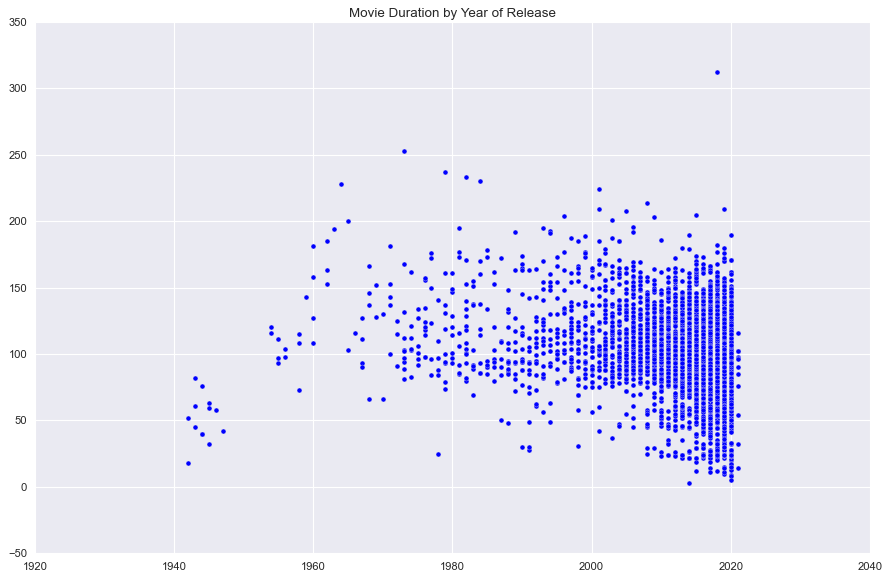

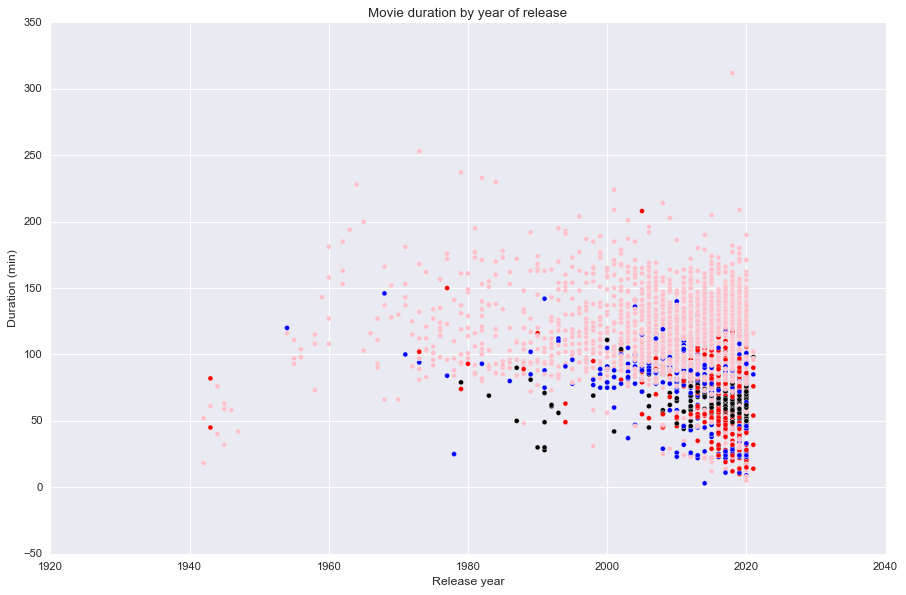

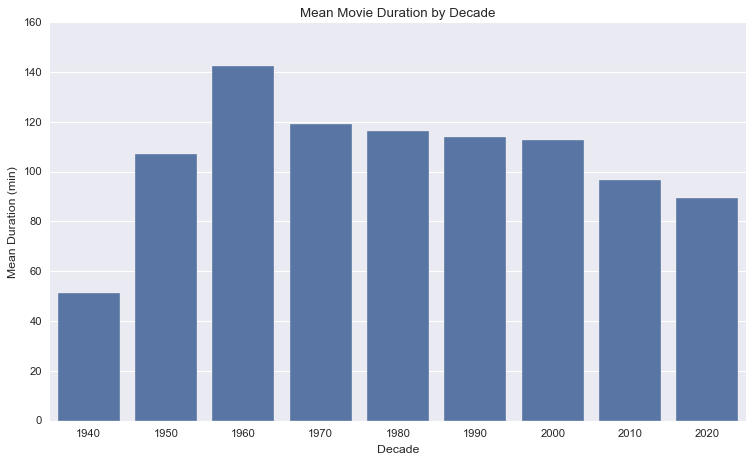

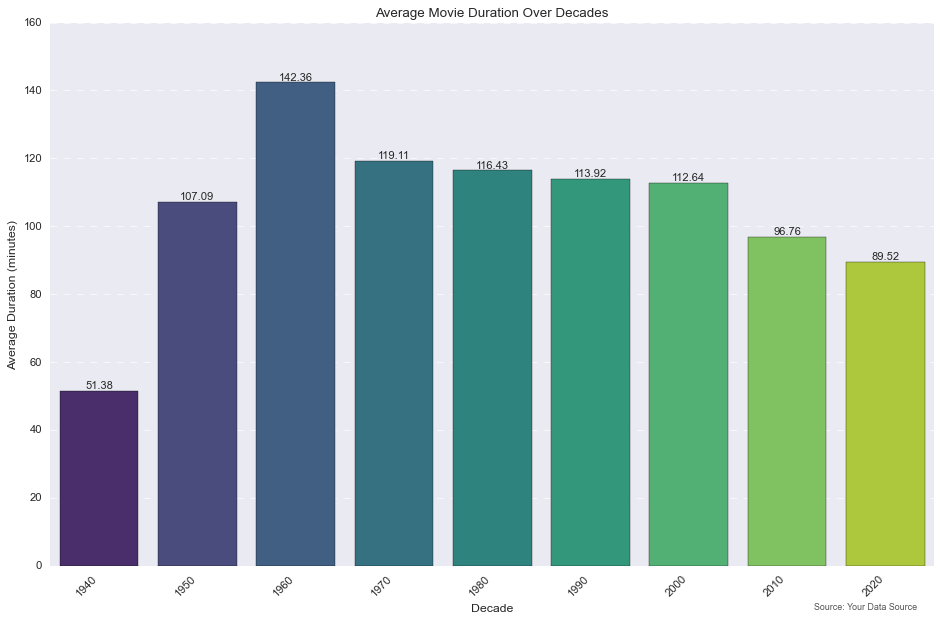

In [48]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the csv file
netflix_df = pd.read_csv("netflix_data.csv")

# Filtering to keep only Movies
netflix_subset = netflix_df[netflix_df['type'] == 'Movie']

# New data frame for investigating movies
netflix_movie = netflix_subset[['title','country','genre','release_year','duration']]

# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movie["release_year"], netflix_movie["duration"])

# Create a title
plt.title('Movie Duration by Year of Release')

# Show the plot
plt.show()

# Movies shorter than 60 mins
short_movies = netflix_movie[netflix_movie['duration'] < 60]

# Initialize an empty list for colors
colors = []

# Iterate over rows of netflix_movies
for lab, row in netflix_movie.iterrows():
    if row['genre'] == "Children":
        colors.append("blue")
    elif row['genre'] == "Documentaries":
        colors.append("red")
    elif row['genre'] == "Stand-Up":
        colors.append("black")
    else:
        colors.append("pink")

# Set the figure style and initialize a new figure
plt.style.use('seaborn')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movie["release_year"], netflix_movie["duration"], c = colors)

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()

# Create a new column for the decade
netflix_movie['decade'] = (netflix_movie['release_year'] // 10) * 10

# Calculate the mean duration for each decade
decade_mean = netflix_movie.groupby('decade')['duration'].mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=decade_mean.index, y=decade_mean.values)
plt.title("Mean Movie Duration by Decade")
plt.xlabel("Decade")
plt.ylabel("Mean Duration (min)")
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'decade_mean' with 'index' as the decade and 'values' as mean duration

plt.figure(figsize=(12, 8))
sns.barplot(x=decade_mean.index, y=decade_mean.values, palette="viridis", edgecolor='black')

# Add values on top of the bars with annotations
for i, value in enumerate(decade_mean.values):
    plt.text(i, value + 0.1, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

# Highlight the highest and lowest bars with a border
max_value_idx = decade_mean.idxmax()
min_value_idx = decade_mean.idxmin()
plt.annotate(f'Highest: {decade_mean[max_value_idx]:.2f} min', 
             xy=(max_value_idx, decade_mean[max_value_idx]), 
             xytext=(max_value_idx, decade_mean[max_value_idx] + 2),
             ha='center', va='bottom', fontsize=10, color='red',
             arrowprops=dict(facecolor='red', arrowstyle='wedge,tail_width=0.7', lw=0.5),
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='white'))

plt.annotate(f'Lowest: {decade_mean[min_value_idx]:.2f} min', 
             xy=(min_value_idx, decade_mean[min_value_idx]), 
             xytext=(min_value_idx, decade_mean[min_value_idx] - 2),
             ha='center', va='top', fontsize=10, color='blue',
             arrowprops=dict(facecolor='blue', arrowstyle='wedge,tail_width=0.7', lw=0.5),
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='blue', facecolor='white'))

plt.title("Average Movie Duration Over Decades")
plt.xlabel("Decade")
plt.ylabel("Average Duration (minutes)")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add grid lines for reference
sns.despine(trim=True, left=True)  # Remove spines for a cleaner appearance

# Add more details
plt.annotate('Source: Your Data Source', xy=(0.98, -0.08), xycoords='axes fraction', ha='right', fontsize=8, color='#555555')
plt.tight_layout()

plt.show()


